In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('fivethirtyeight')

%matplotlib inline

os.chdir(r'D:\OSU\Spring 2022\MSIS 5223\msis-5223-deliverable-1-cobra-kai-main\data')
os.getcwd()

'D:\\OSU\\Spring 2022\\MSIS 5223\\msis-5223-deliverable-1-cobra-kai-main\\data'

In [4]:
college_data = pd.read_csv('College_Data_Transformed.csv')
college_data.head()

,college_name,is_private,no_of_applications,no_of_apps_accepted,no_of_enrolled,PctTop10HS,PctTop25HS,no_of_FT,no_of_PT,outstate_tuition,...,books_cost,personal_spending,pct_phd_faculty,pct_termianl_faculty,sf_ratio,pct_alumni_donors,exp_per_student,grad_rate,total_misc_cost,accept_rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,450,2200,70,78,18.1,12,7041,60,5950,74.22
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,750,1500,29,30,12.2,16,10527,56,8700,88.01
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,400,1165,53,66,12.9,30,8735,54,5315,76.82
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,450,875,92,97,7.7,37,19016,59,6775,83.69
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,800,1500,76,72,11.9,2,10922,15,6420,75.65


In [3]:
#Creating dataframe that has average of percent of faculty members
p1 = college_data[['pct_phd_faculty','pct_termianl_faculty','is_private']]
p1 = p1.groupby(['is_private']).mean()
p1.reset_index(inplace=True)
print(p1)

  is_private  pct_phd_faculty  pct_termianl_faculty
0         No        76.828571             82.928571
1        Yes        70.969259             78.428571


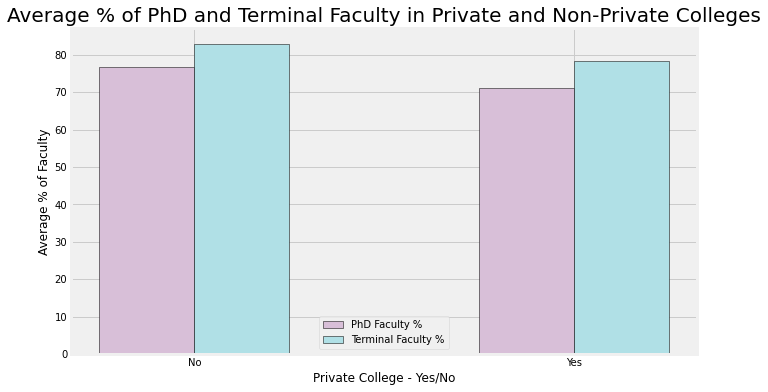

In [9]:
#Creating a bar graph for above dataframe

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
n=2
r = np.arange(n)
width = 0.25
x= list(p1['pct_phd_faculty']) 
y= list(p1['pct_termianl_faculty'])
z= list(p1['is_private'])
  
plt.bar(r,x, color = 'thistle',
        width = width, edgecolor = 'black',
        label='PhD Faculty %')
plt.bar(r + width,y , color = 'powderblue',
        width = width, edgecolor = 'black',
        label='Terminal Faculty %')
  
plt.xlabel("Private College - Yes/No", fontsize = 12)
plt.ylabel("Average % of Faculty", fontsize = 12)
plt.title("Average % of PhD and Terminal Faculty in Private and Non-Private Colleges", fontsize = 20)
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,z)
plt.legend()
plt.show()

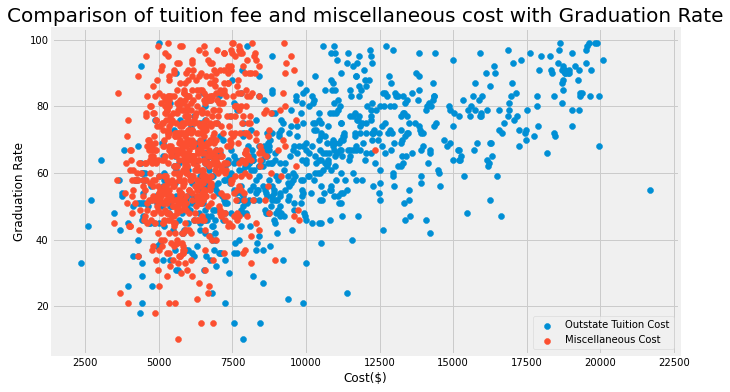

In [8]:
#Creating scatterplot between Tution/Miscellaneous cost and Graduation Rate
plt.scatter(college_data['outstate_tuition'],college_data['grad_rate'],label='Outstate Tuition Cost')
plt.scatter(college_data['total_misc_cost'],college_data['grad_rate'], label = 'Miscellaneous Cost')
plt.legend()
plt.xlabel("Cost($)")
plt.ylabel("Graduation Rate")
plt.title("Comparison of tuition fee and miscellaneous cost with Graduation Rate", fontsize = 20)
plt.show()

In [6]:
college_data.columns

Index(['college_name', 'is_private', 'no_of_applications',
       'no_of_apps_accepted', 'no_of_enrolled', 'PctTop10HS', 'PctTop25HS',
       'no_of_FT', 'no_of_PT', 'outstate_tuition', 'room_board_cost',
       'books_cost', 'personal_spending', 'pct_phd_faculty',
       'pct_termianl_faculty', 'sf_ratio', 'pct_alumni_donors',
       'exp_per_student', 'grad_rate', 'total_misc_cost', 'accept_rate'],
      dtype='object')

<AxesSubplot:>

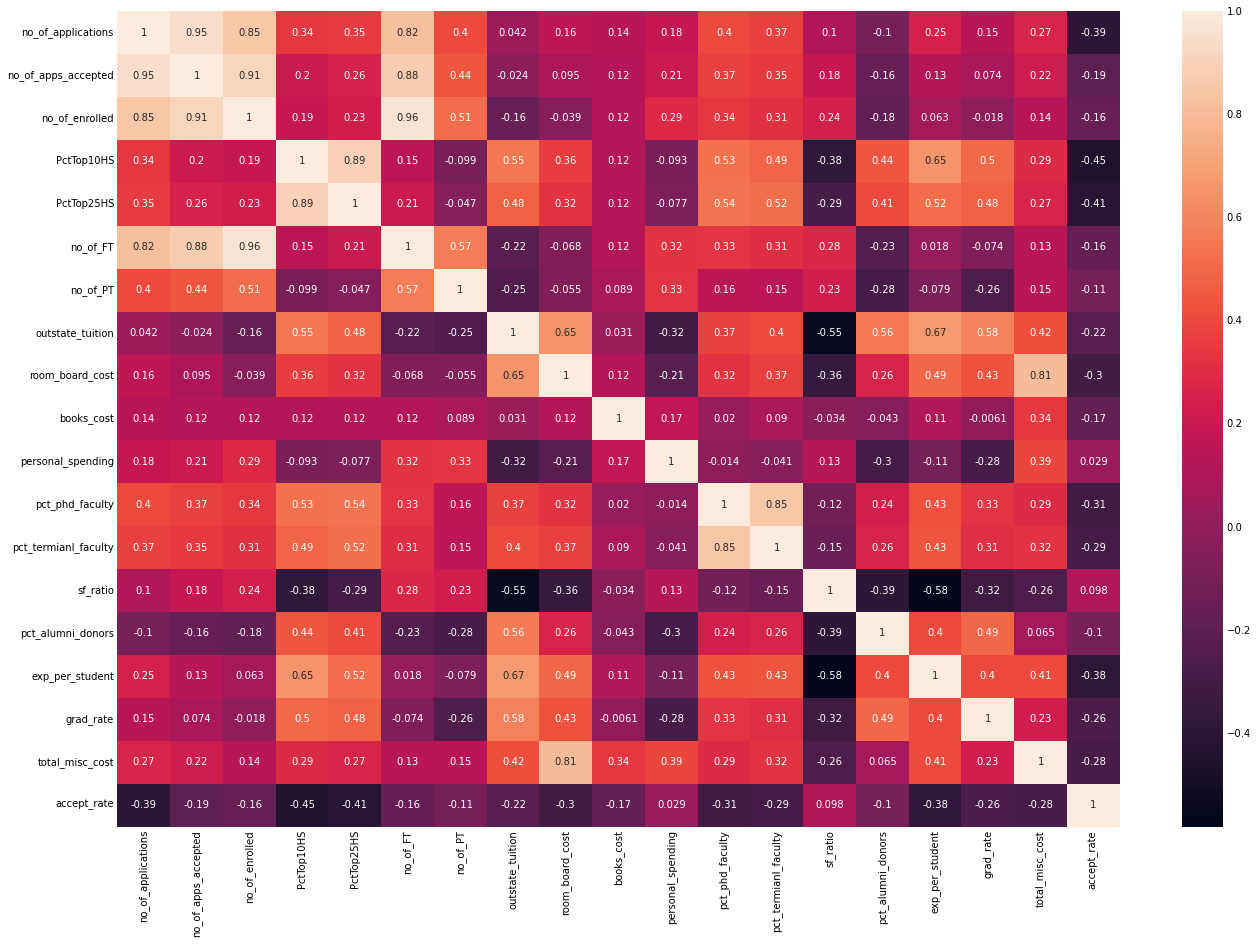

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,15))  

relation =college_data.corr()
relation_index=relation.index
sns.heatmap(college_data[relation_index].corr(),annot=True)

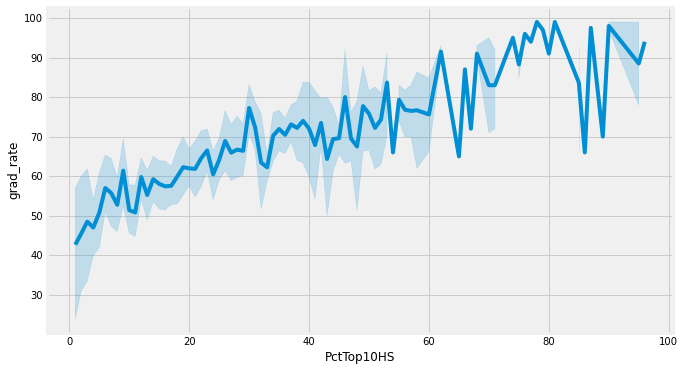

In [50]:

sns.lineplot(x = "PctTop10HS", y = "grad_rate", data = college_data)
plt.show()

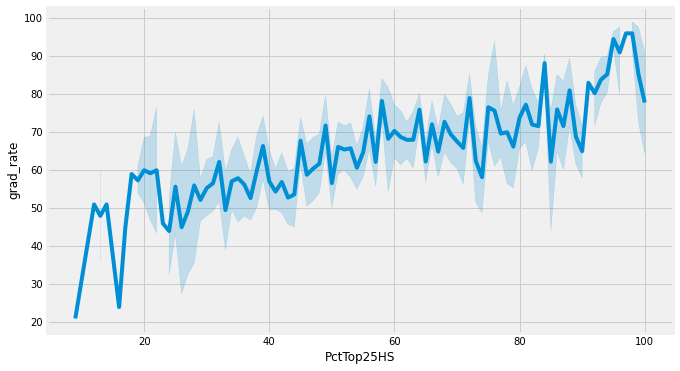

In [51]:

sns.lineplot(x = "PctTop25HS", y = "grad_rate", data = college_data)
plt.show()